In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [11]:
#Importar data
df = pd.read_csv("data.csv")
print(df.head())

C:\Users\acer\AppData\Local\Temp\ipykernel_4424\1757755306.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

  Cost Revenue   Price  Utility  Rank  Combination  Dry  ...  Unnamed: 991  \
0  175    0.15  201.25    26.25   4.1          1.0  1.0  ...           NaN   
1  179    0.13  202.27    23.27   4.1          1.0  1.0  ...           NaN   
2   68    0.12   76.16     8.16   4.4          1.0  1.0  ...           NaN   
3  175    0.12  196.00    21.00   3.8          1.0  1.0  ...           NaN   
4   38    0.09   41.42     3.42   4.1          1.0  1.0  ...           NaN   

   Unnamed: 992  Unnamed: 993  Unnamed: 994 

In [13]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
df = pd.read_csv("data.csv")

# Seleccionar todas las filas y las columnas hasta 'Dry' (inclusive)
new_df = df.iloc[:, :df.columns.get_loc('Sensitive')+1]

# Mostrar el nuevo DataFrame
print(new_df)


C:\Users\acer\AppData\Local\Temp\ipykernel_4424\3481664900.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


            Label                          Brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   Name Cost Revenue   Price  \
0                                       Crème de la Mer  175    0.15  201.25   
1                              Facial Treatment Essence  179    0.13  202.27   
2                            Protini™ Polypeptide Cream   68    0.12   76.16   
3                           The Moisturizing Soft Cream

In [15]:
new_df.shape


(1472, 13)

In [16]:
print(new_df.head())


         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

  Cost Revenue   Price  Utility  Rank  Combination  Dry  Normal  Oily  \
0  175    0.15  201.25    26.25   4.1          1.0  1.0     1.0   1.0   
1  179    0.13  202.27    23.27   4.1          1.0  1.0     1.0   1.0   
2   68    0.12   76.16     8.16   4.4          1.0  1.0     1.0   1.0   
3  175    0.12  196.00    21.00   3.8          1.0  1.0     1.0   1.0   
4   38    0.09   41.42     3.42   4.1          1.0  1.0     1.0   1.0   

   Sensitive  
0        1.0  
1        1.0  
2        0.0  
3        1.0  

In [67]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv("data.csv")

# Seleccionar todas las filas y las columnas hasta 'Dry' (inclusive)
new_df = df.iloc[:, :df.columns.get_loc('Sensitive')+1]

# Mostrar el nuevo DataFrame
print(new_df)

            Label                          Brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   Name Cost Revenue   Price  \
0                                       Crème de la Mer  175    0.15  201.25   
1                              Facial Treatment Essence  179    0.13  202.27   
2                            Protini™ Polypeptide Cream   68    0.12   76.16   
3                           The Moisturizing Soft Cream

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17220\2774417821.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


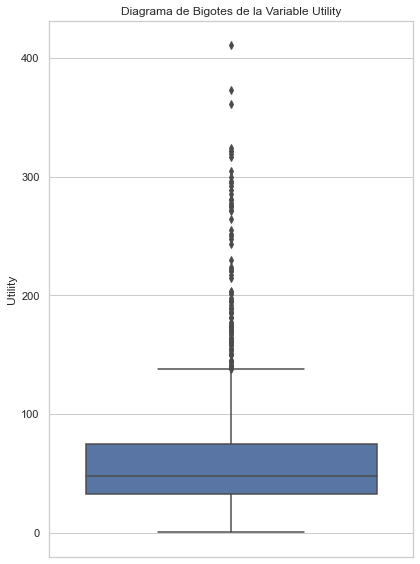

In [84]:
#Boxplot Utility
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Utility'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Utility' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Utility')
plt.ylabel('Utility')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


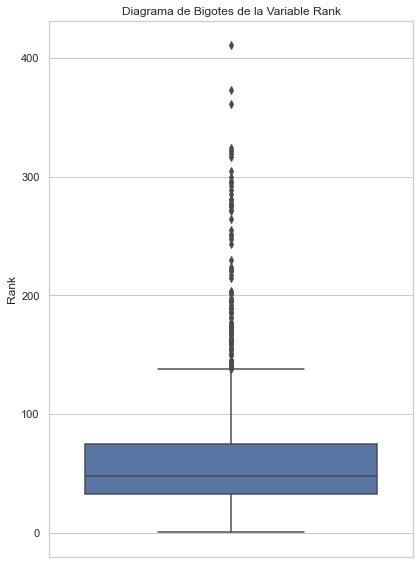

In [85]:
#Boxplot Rank
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Rank'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Rank' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Rank')
plt.ylabel('Rank')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


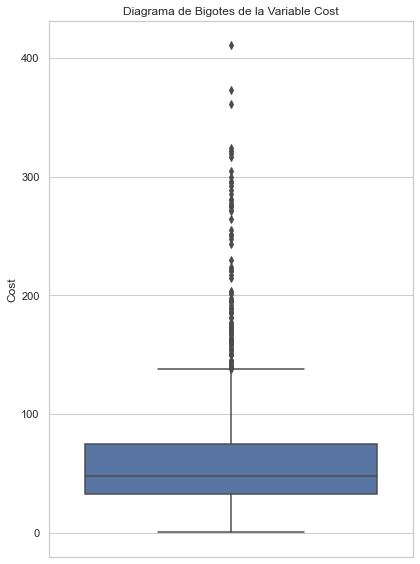

In [86]:
#Boxplot Cost
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Cost'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Cost' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Cost')
plt.ylabel('Cost')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


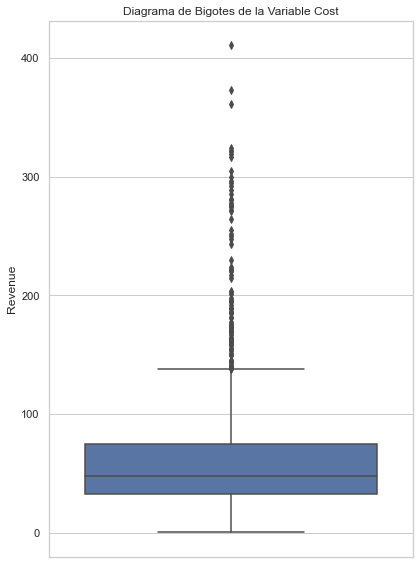

In [87]:
#Boxplot Revenue
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Cost'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Cost' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Cost')
plt.ylabel('Revenue')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()